## Task 1: Processing the dataset

Perform some simple pre-processing operations on the given data. There are two sub-tasks in this task. More specifically:

In [1]:
#loading the dataset into a pandas Dataframe

import numpy as np
import pandas as pd

Dataset_location = open(r'C:\Users\galan\OneDrive\Έγγραφα\Python Lab Machine Learning\ML_assignment_2022_2023\CarPrice_Assignment.csv')

# Load the input CSV file into a Pandas dataframe
data = pd.read_csv(Dataset_location, sep=',')

# Printing the 10 first rows of the dataframe
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### 1.1 Replace the column `CarName` by `CompanyName`.

`CompanyName` contains the brand of the car. Derive it by taking the first word of `CarName`. For example:
 * if `CarName='alfa-romero giulia'`, then `CompanyName='alfa-romero'`
 * if `CarName='audi 100ls'`, then `CompanyName='audi'`

In [3]:
#replacing the CarName attribute with the string 'CompanyName'

data.rename(columns = {'CarName':'CompanyName'}, inplace = True)

data.head(5)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#just taking the first word of each sample from the 'CompanyName'. This means that we take only the company name from the whole car name

data['CompanyName'] = data['CompanyName'].str.split().str.get(0)

data.head(5)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 1.2 Drop the `car_ID` column

After this process, the dataset must consist of 205 rows and 25 columns (24 features + 1 target variable).


In [5]:
#we are deleting the 'car_ID' attribute

del data['car_ID']

data.head(10)

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


## Task 2: Feature engineering

The dataset contains both numerical and categorical features. There are five sub-tasks in this task. More specifically:


### 2.1. Dataset statistics

Report the minimum, maximum, and mean values for each numerical feature.


In [6]:
#using the describe method

data.describe().loc[['min', 'max', 'mean']]

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.00000,5118.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.00000,45400.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.75122,13276.710571


### 2.2. How many missing values do we have per column?

Count the number of rows that have missing values per column.

In [7]:
#checking if we have any missing values per column

data.isnull().sum()

symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### 2.3. Correlation with the target variables (visual)

Study the correlation of each of the 24 features with the target variable (car price). More specifically:

* Create plots that illustrate the feature values against the target variable.
 * Regarding the numerical input variables, create scatter plots similar to the ones that were presented in the notebook about Linear Regression.
 * For the categorical features, you must compute the mean car prices per feature value. For example, the feature `fueltype` is categorical and the average price of the cars with 
`diesel` is 15838.15, whereas the average price for cars with `gas` is 12999.7982. Then create the respective bar plots.


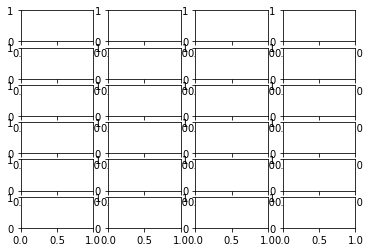

In [8]:
#computing the perfect number of subplots for our dataset in order to be visualized optimally

import math
import matplotlib.pyplot as plt

# Calculate the number of rows and columns needed to plot 25 variables
n_vars = 24
n_cols = 4
n_rows = math.ceil(n_vars / n_cols)

# Create a figure with n_rows rows and n_cols columns of subplots
fig, ax = plt.subplots(n_rows, n_cols)

In [9]:
#printing the total number of rows for our subplots

print(n_rows)

6


In [10]:
#creating a variable with all the columns except the target variable meaning the 'price' column

columns_without_target_var = data.columns[:-1]
columns_without_target_var

Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

We are creating a for loop so as to iterate every attribute from our dataset.
For every iteration we store the either numerical or categorical feature
in the corresponding variable list and simultaneously creating subplots
for each attribute against the price feature.

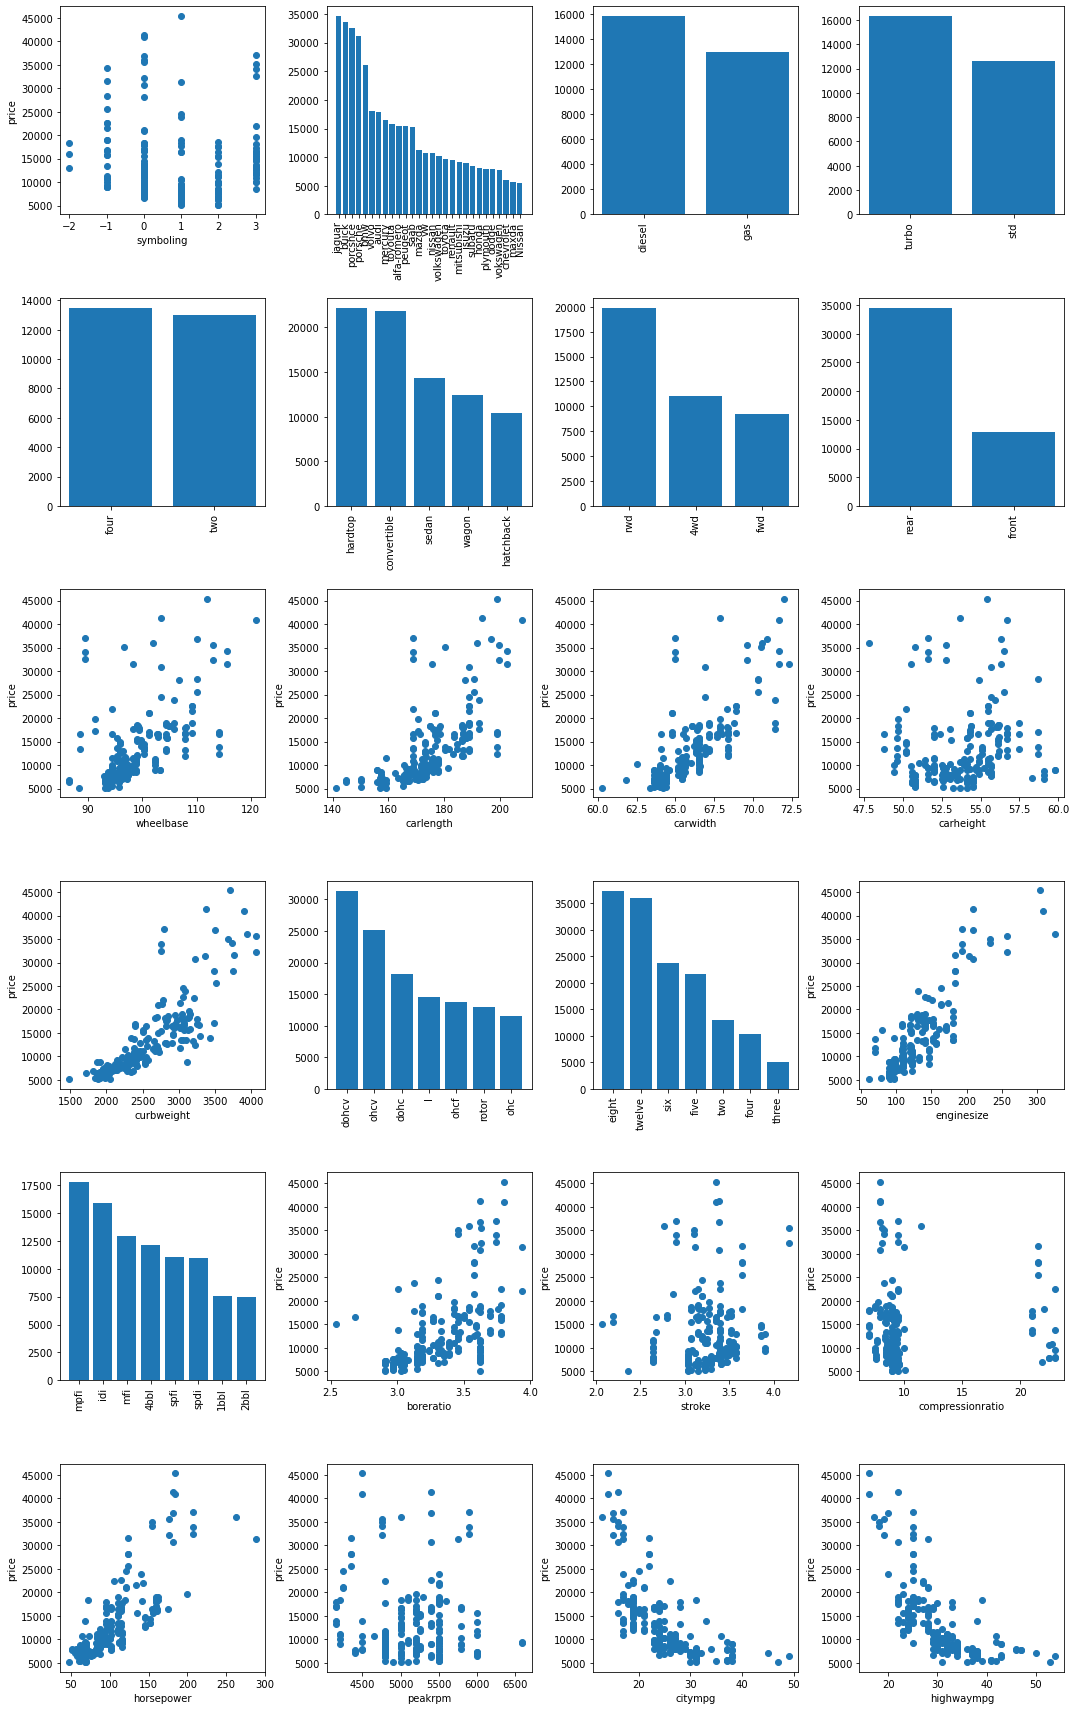

In [11]:
# Select the target variable
target = 'price'

fig = plt.figure(figsize=(18, 36))

# Increase the height and width of the subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

i = 0
numerical_var = []
categorical_var = []
# Loop through the columns of the dataframe
for column in columns_without_target_var:
    # Check the data type of the column
    if data[column].dtype in ['int64', 'float64']:
        ## Create scatter plots for the numerical input variables
        numerical_var.append(column)
        i += 1
        plt.subplot(7,4, i)
        plt.scatter(data[column], data[target])
        plt.xlabel(column)
        plt.ylabel(target)
    else:
        # Create bar plots for the categorical input variables
        categorical_var.append(column)
        grouped_data = data.groupby(data[column])[target].mean().reset_index()
        sorted_data = grouped_data.sort_values(target, ascending = False)
        i += 1
        plt.subplot(7,4, i)
        plt.bar(sorted_data[column], sorted_data[target])
        plt.xticks(rotation=90)
plt.show()

As we can see from the scatter plots car price increases as we increase carlength, carwidth, curbwidth, enginesize, boreratio and horsepower. Car price decreases as we increase citympg and highwaympg. Car price is unaffected by wheelbase. carheight, stroke, compressionratio and peakrpm.

In [12]:
#checking the categorical and numerical variables excluding the price column

print(categorical_var,'\n',numerical_var)

['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] 
 ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


### 2.4 Managing the categorical features

The existence of categorical features creates several problems, as the majority of data engineering and machine learning algorithms work only with numerical data. We can either drop the categorical features, or convert them to numerical ones. 
Here are the two required actions:

* Drop the `CompanyName` feature, and
* Convert the categorical features to numerical by applying one-hot-encoding. In one-hot-encoding the first value of each encoded feature is not required. So to reduce dimensionality, remove this first value from each one-hot-encoded feature.

  **Hint:** If you are managing the data with Pandas dataframes, use the `get_dummies` method with `drop_first=True`.

After this process, the shape of the dataset must be 205 rows $\times$ 44 columns.


In [13]:
#deleting the CompanyName attribute

del categorical_var[0]
print(categorical_var)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [14]:
#using a variable so as to have the numerical attributes first and then all the categorical variables

concat_var = numerical_var + categorical_var

print(concat_var)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


We use the OneHotEncoder so as to change the categorical features to numerical ones
and then we use dummies for these features in order to be placed in the dataset.
Also, the drop_first parameters set to True will exclude the first column of each of the encoded attributes.

In [15]:
from sklearn.preprocessing import OneHotEncoder

X = data[categorical_var].values

# OneHotEncoder() object
data_ohe = OneHotEncoder()

encoded_data = data_ohe.fit_transform(X).toarray()

encoded_data = pd.get_dummies(data[concat_var], drop_first=True)

encoded_data

C:\Users\galan\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
#getting the target variable meaning the 'price' column of the dataset

last_column = data.iloc[:,-1]

last_column

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

Concatenating the encoded dataset with the 'price' column in the end of it.
This way we have a full dataset with encoded values for each categorical feature and
the last column contain our target feature.

In [17]:
final_encoded_dataset = pd.concat([encoded_data, last_column], axis = 1)

final_encoded_dataset

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,1,0,0,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,1,0,0,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,1,0,0,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,1,0,0,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,1,0,0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,1,0,0,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,1,0,0,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,1,0,0,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,1,0,0,0,0,22470.0


### 2.5 Correlation with the target variables (numerical)

This is an important process, as it indicates the features that are strongly correlated to the target variable. There are several ways of estimating this correlation.

* Compute the Pearson coefficient that quantifies the pairwise correlations of the dataset columns (including the target variable).

In [18]:
#computing the pearson coefficient

# Compute the correlations between all the columns and the target variable
correlations = final_encoded_dataset.corr()

# Compute the absolute values of the correlations
abs_correlations = correlations.abs()

* Identify the 8 features that have the strongest correlation with the target variable.

In [19]:
# Sort the correlations in descending order based on their absolute values
sorted_correlations = abs_correlations['price'].sort_values(ascending=False)

sorted_correlations.head(10)

price                  1.000000
enginesize             0.874145
curbweight             0.835305
horsepower             0.808139
carwidth               0.759325
cylindernumber_four    0.697762
highwaympg             0.697599
citympg                0.685751
carlength              0.682920
drivewheel_rwd         0.638957
Name: price, dtype: float64

* Create a heatmap of the pairwise feature correlations like the following one.

**Hint:** use the `seaborn` library.


* The following plot was created using the seaborn library and the documentation of it can be found here https://seaborn.pydata.org/generated/seaborn.heatmap.html

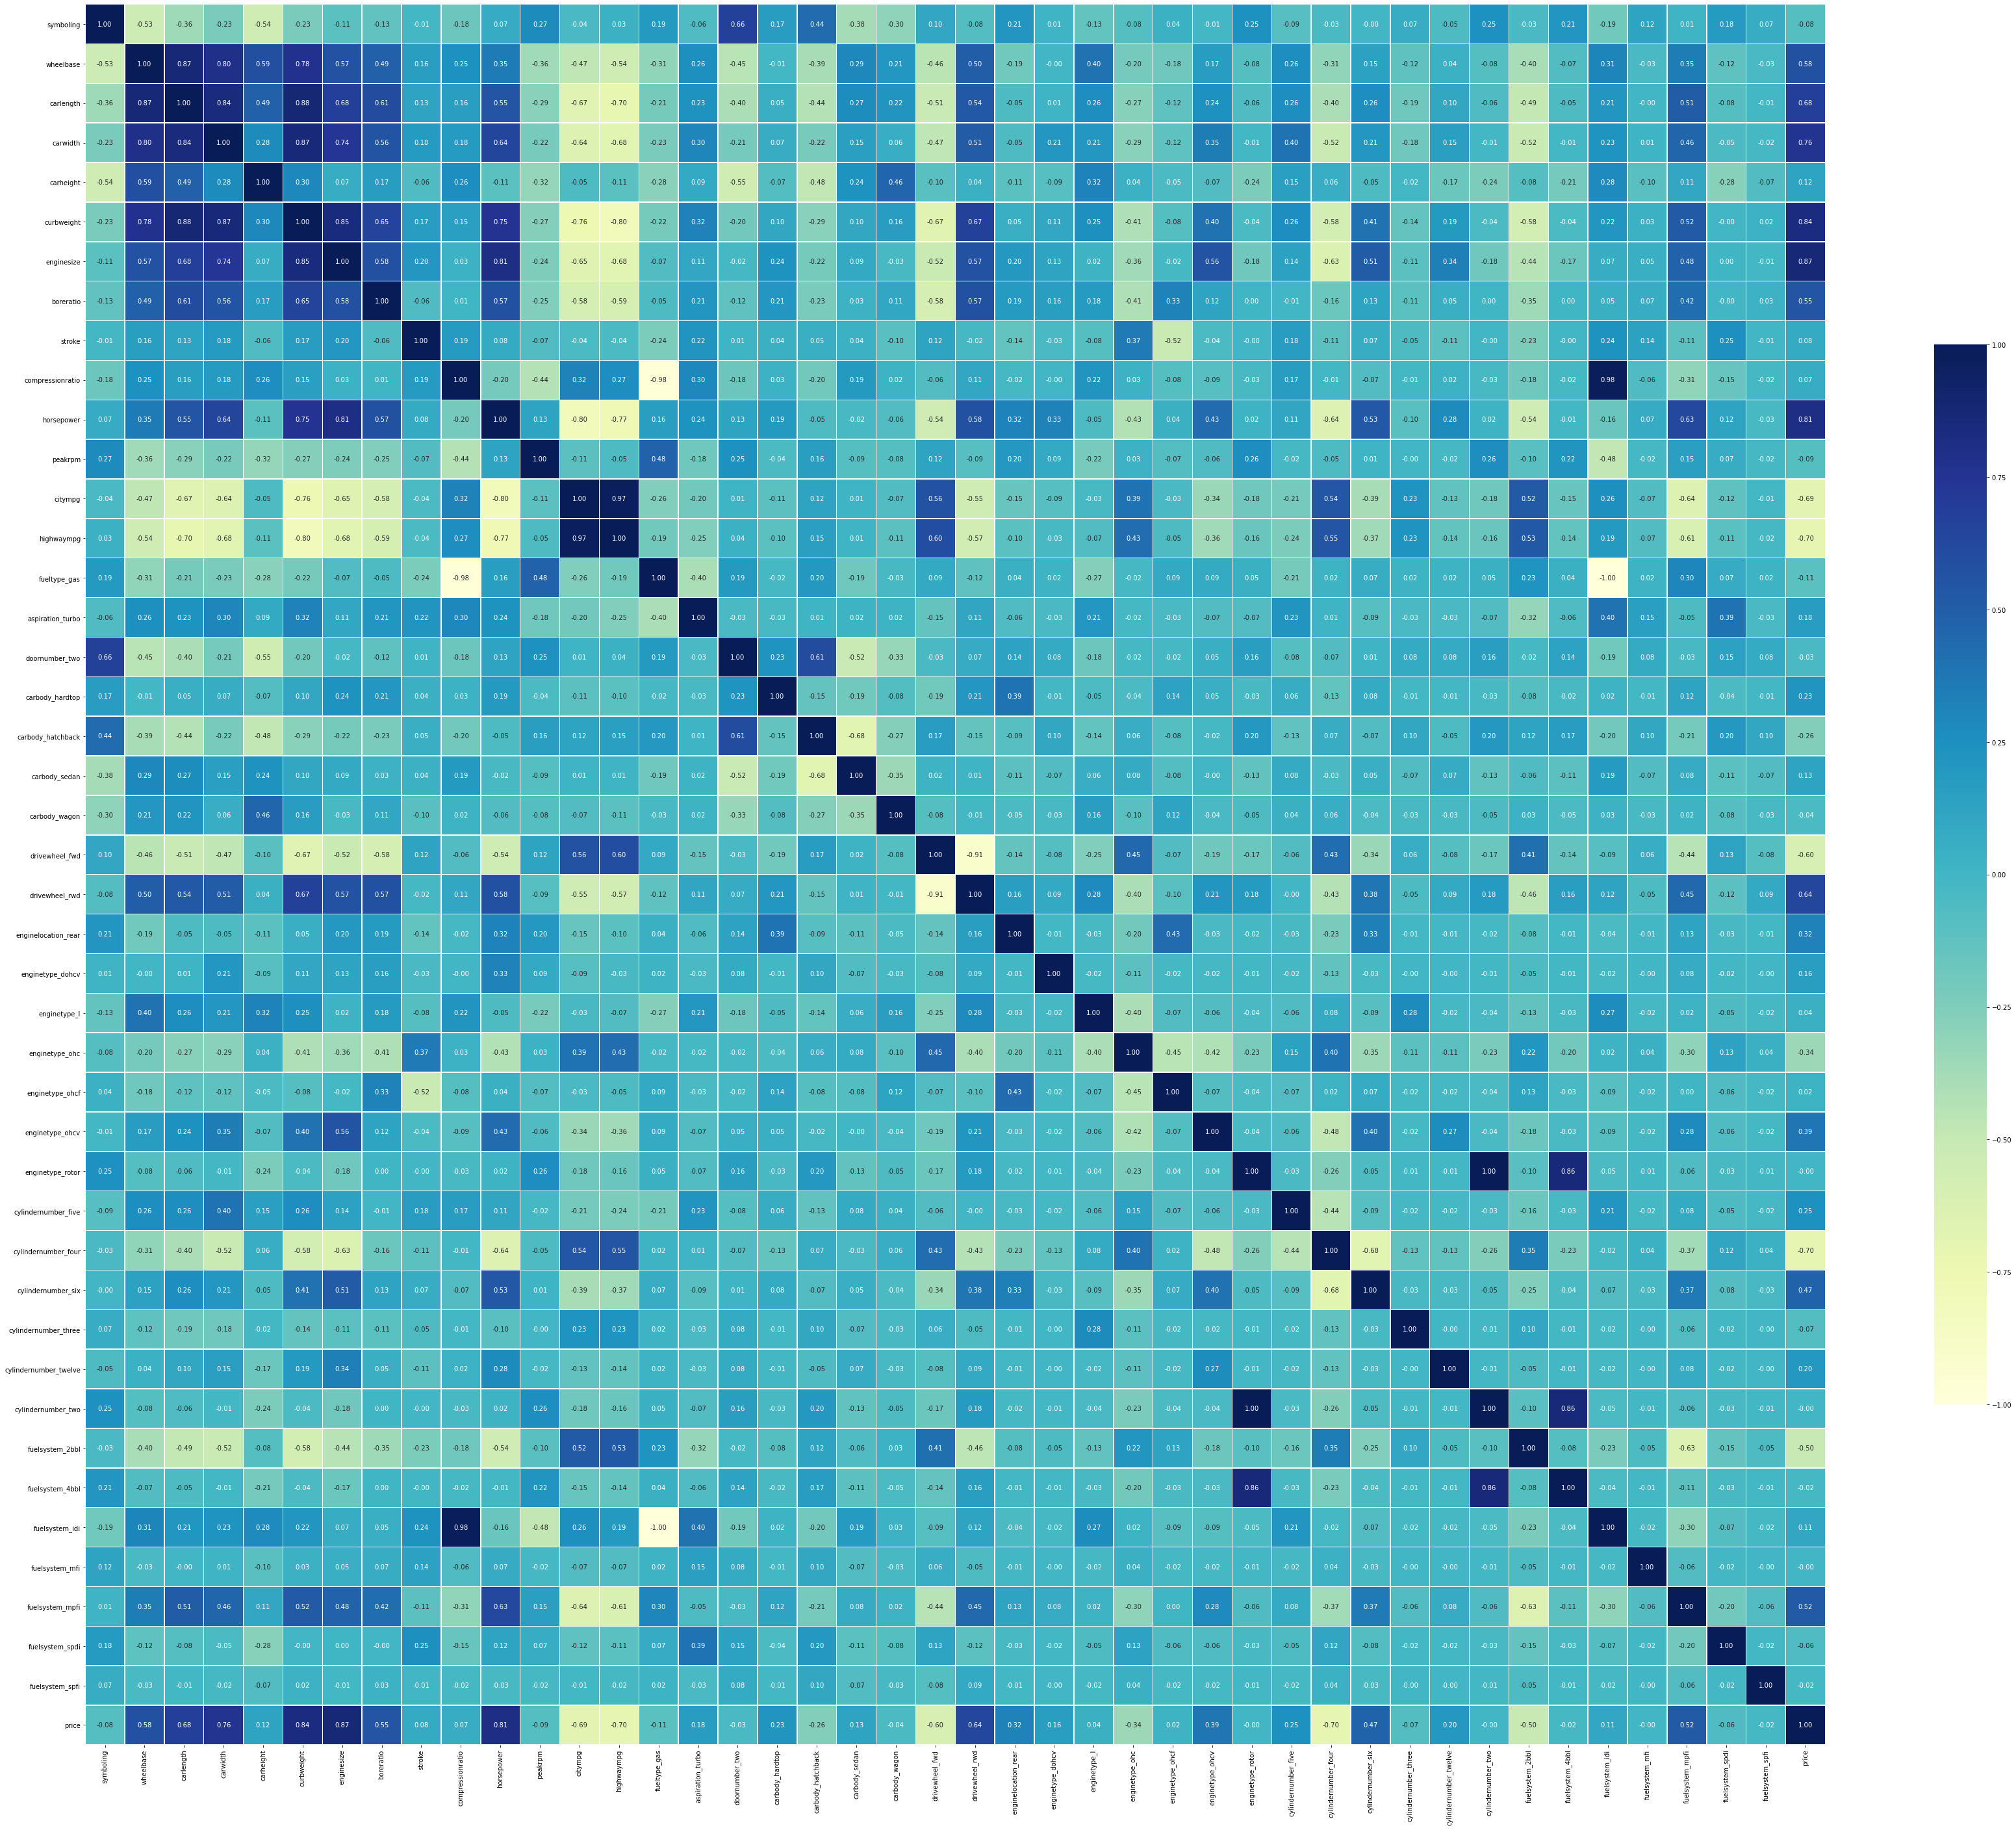

In [20]:
#Creating a heatmap with seaborn library

import seaborn as sns

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(60, 60))

# Generating a custom diverging colormap
cmap = sns.color_palette("Blues", as_cmap=True)

# Drawing the heatmap
sns.heatmap(correlations, cmap="YlGnBu", vmax=1, vmin=-1, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

# Task 3: Create a model to predict car prices

This is a typical Regression problem. Experiment with the following scikit-learn algorithms:
* `LinearRegression`: Ordinary Least Squares Linear Regression.
* `Ridge`: Linear least squares with L2 regularization.
* `Lasso`: Linear Model trained with L1 prior as regularizer (aka the Lasso).
* `DecisionTreeRegressor`: Decision Tree for Regression problems.
* `RandomForestRegressor`: Random Forest for Regression problems.
* `MLPRegressor`: Multilayer Perceptron (feed-forward neural networks) for Regression problems.

Use 70% of the dataset for training and the rest 30% for testing.


Train the models by studying the effect of various hyper-parameters. Create a comparative table of Mean Squared Error, Mean Absolute Error, and R2 score for each algorithm. Present the results using bar plots (see the examples below).


In [21]:
#Seperating the dataset into X and Y variables
#X includes all the data except the target variable
#Y has only the target feature

X = final_encoded_dataset.drop('price', axis=1)
Y = final_encoded_dataset['price']

In [22]:
#Plotting the X variable

X

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
#Plotting the Y variable

Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

Creating a function in order to train and to evaluate multiple regression models
with different hyperparameter settings and in the end this fucntion returns the best results for each model.
We used the class sklearn.model_selection.GridSearchCV

The documentation can be found here:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

So, the function is taking the parameters below:
- models : list
(A list of tuples containing the name and instance of each model to evaluate.)
- param_grids : dict
(A dictionary containing the hyperparameter grids for each model.)
- X_train : array-like or pd.DataFrame
(The training data.)
- y_train : array-like or pd.Series
(The training labels.)
- X_test : array-like or pd.DataFrame
(The test data.)
- y_test : array-like or pd.Series
(The test labels.)


Returns
- best_models : dict
(A dictionary containing the best models and their hyperparameter settings for each model.)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def find_best_model(models, param_grids, X_train, y_train, X_test, y_test):
    
    
    
    best_models = {}
    
    for name, model in models:
        # Here a grid search object with a specific hyperparameter grid is created
        if name in param_grids:
            grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1, return_train_score=True)
        else:
            grid_search = None
        
        # Fitting the model with the grid search objected created above
        if grid_search:
            grid_search.fit(X_train, y_train)
            model = grid_search.best_estimator_
        else:
            model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculating the evaluation metrics needed
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Save the best model and its hyperparameter settings
        if grid_search:
            best_models[name] = {'model': model, 'best_params': grid_search.best_params_, 'MSE': mse, 'MAE': mae, 'R2': r2}
        else:
            best_models[name] = {'model': model, 'MSE': mse, 'MAE': mae, 'R2': r2}
    
    return best_models

We importing all the important required models from their corresponding libraries.
Then we define the models and their hyperparameters in order to get the best result of each model with its corresponding hyperparameters.

The documentation of each algorithm can be found below:
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Define the models and their hyperparameter grids
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('MLP', MLPRegressor())
]
param_grids = {
    'Ridge': {'alpha': [0.1, 1, 10], 'max_iter': [500, 1000, 2000], 'random_state': [42]},
    'Lasso': {'alpha': [0.1, 1, 10], 'max_iter': [500, 1000, 2000], 'random_state': [42]},
    'Decision Tree': {'max_depth': [3, 5, 7], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 2, 3], 'random_state': [42]},
    'Random Forest': {'n_estimators': [50, 100], 'min_samples_split': [2, 4, 6], 'random_state':[42]},
    'MLP': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.1, 1, 10], 'activation':['tanh', 'relu'], 'learning_rate_init': [0.01, 0.1], 'max_iter': [500, 1000, 2000], 'random_state':[42]}
}

We split the dataset meaning 70% of data will be for training the model and
the 30% left will be held for testing the model.

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Find the best models
best_models = find_best_model(models, param_grids, X_train, y_train, X_test, y_test)

We print each model's best performance along with its corresponding information :

In [27]:
for name, result in best_models.items():
    print(name)
    if 'best_params' in result:
        print("Best parameters:", result['best_params'])
    else:
        print("Best parameters: N/A")
    print("MSE:", result['MSE'])
    print("MAE:", result['MAE'])
    print("R2:", result['R2'])

Linear Regression
Best parameters: N/A
MSE: 7052032.685190984
MAE: 1889.8051330425226
R2: 0.8982161227892844
Ridge
Best parameters: {'alpha': 1, 'max_iter': 500, 'random_state': 42}
MSE: 10458127.805929443
MAE: 2221.018839715082
R2: 0.8490550393097243
Lasso
Best parameters: {'alpha': 10, 'max_iter': 500, 'random_state': 42}
MSE: 8657248.069408312
MAE: 2048.062085019001
R2: 0.8750476190602772
Decision Tree
Best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}
MSE: 9743210.62473168
MAE: 2031.6330591397846
R2: 0.8593736305351553
Random Forest
Best parameters: {'min_samples_split': 4, 'n_estimators': 100, 'random_state': 42}
MSE: 4015119.9048493844
MAE: 1399.1961819665555
R2: 0.942048698634127
MLP
Best parameters: {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01, 'max_iter': 1000, 'random_state': 42}
MSE: 9174552.920195056
MAE: 2017.3077789002566
R2: 0.8675812195463392


Below we create a Pandas Dataframe with the corresponding required information for each model

In [28]:
# Create an empty DataFrame with the appropriate columns
results_df_analytical = pd.DataFrame(columns=['Model', 'Best Parameters', 'MSE', 'MAE', 'R2'])

#set column width so as all the information of column to be visible
pd.set_option('display.max_colwidth', 140)

# Iterate over the best_models dictionary and add each model's results as a row in the DataFrame
for name, result in best_models.items():
    # Check if the model has a 'best_params' field
    if 'best_params' in result:
        # Add the model's results to the DataFrame
        row = {
            'Model': name,
            'Best Parameters': result['best_params'],
            'MSE': result['MSE'],
            'MAE': result['MAE'],
            'R2': result['R2']
        }
    else:
        # Add the model's results to the DataFrame with "N/A" for the 'Best Parameters' field
        row = {
            'Model': name,
            'Best Parameters': "N/A",
            'MSE': result['MSE'],
            'MAE': result['MAE'],
            'R2': result['R2']
        }
    results_df_analytical = results_df_analytical.append(row, ignore_index=True)


results_df_analytical

,Model,Best Parameters,MSE,MAE,R2
0,Linear Regression,N/A,7.052033e+06,1889.805133,0.898216
1,Ridge,"{'alpha': 1, 'max_iter': 500, 'random_state': 42}",1.045813e+07,2221.018840,0.849055
2,Lasso,"{'alpha': 10, 'max_iter': 500, 'random_state': 42}",8.657248e+06,2048.062085,0.875048
3,Decision Tree,"{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}",9.743211e+06,2031.633059,0.859374
4,Random Forest,"{'min_samples_split': 4, 'n_estimators': 100, 'random_state': 42}",4.015120e+06,1399.196182,0.942049
5,MLP,"{'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01, 'max_iter': 1000, 'random_state': 42}",9.174553e+06,2017.307779,0.867581


So, from the above table we report only the best-performing results for each model alongside with their corresponding settings.




- Linear Regression - we did not specify in this model any parameters. The results are MSE: 7.052033e+06, MAE: 1889.805133, R2: 0.898216

- Ridge - We tried 'alpha': [0.1, 1, 10], 'max_iter': [500, 1000, 2000], 'random_state': [42] and we got the best results for parameters 'alpha': 1, 'max_iter': 500, 'random_state': 42. The results are MSE: 1.045813e+07, MAE: 	2221.018840, R2: 0.849055

- Lasso - We tried 'alpha': [0.1, 1, 10], 'max_iter': [500, 1000, 2000], 'random_state': [42] and we got the best results for parameters 'alpha': 10, 'max_iter': 500, 'random_state': 42. The results are MSE: 8.657248e+06, MAE: 2048.062085, R2:0.875048

- Decision Tree - We tried 'max_depth': [3, 5, 7], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 2, 3], 'random_state': [42] and we got the best results for parameters 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42. The results are MSE: 9.743211e+06, MAE: 2031.633059, R2: 0.859374

- Random Forest - We tried 'n_estimators': [50, 100], 'min_samples_split': [2, 4, 6], 'random_state':[42] and we got the best results for parameters 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 42. The results are MSE: 4.015120e+06, MAE:1399.196182, R2: 0.942049

- MLP - We tried 'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.1, 1, 10], 'activation':['tanh', 'relu'], 'learning_rate_init': [0.01, 0.1], 'max_iter': [500, 1000, 2000], 'random_state':[42] and we got the best results for parameters 'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01, 'max_iter': 1000, 'random_state': 42. The results are MSE: 9.174553e+06, MAE: 2017.307779, R2: 0.867581

Below we are creating a function to return a table with the required information when given a new set of data:

In [29]:
def create_results_table(best_models):
    # Create an empty DataFrame with the appropriate columns
    results_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2'])

    # Iterate over the best_models dictionary and add each model's results as a row in the DataFrame
    for name, result in best_models.items():
          # Add the model's results to the DataFrame
        row = {
          'Model': name,
          'MSE': result['MSE'],
          'MAE': result['MAE'],
          'R2': result['R2']}
    
        results_df = results_df.append(row, ignore_index=True)
    return results_df

In [30]:
results_df = create_results_table(best_models)

results_df

,Model,MSE,MAE,R2
0,Linear Regression,7.052033e+06,1889.805133,0.898216
1,Ridge,1.045813e+07,2221.018840,0.849055
2,Lasso,8.657248e+06,2048.062085,0.875048
3,Decision Tree,9.743211e+06,2031.633059,0.859374
4,Random Forest,4.015120e+06,1399.196182,0.942049
5,MLP,9.174553e+06,2017.307779,0.867581


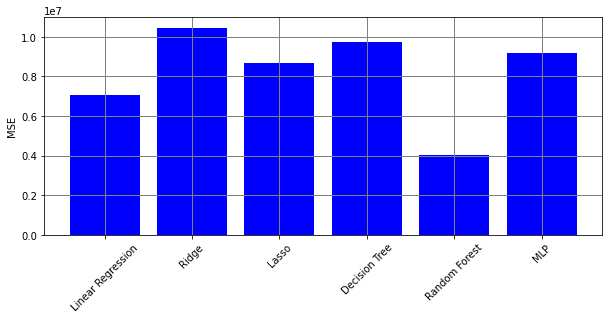

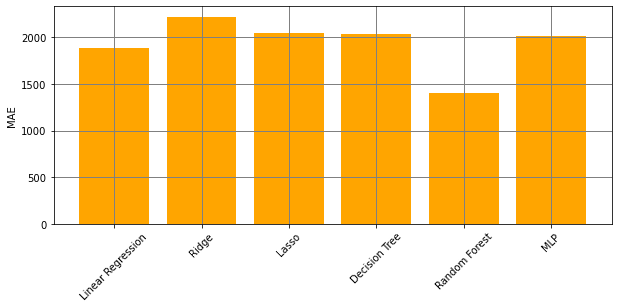

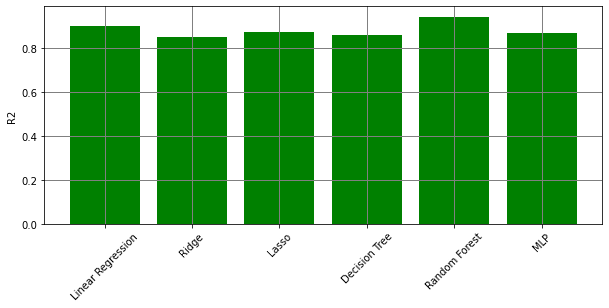

In [31]:
# Define a list of the scores to plot
scores = ['MSE', 'MAE', 'R2']

# Define a list of the colors to use
colors = ['blue', 'orange', 'green']

# Iterate over the scores
for score, color in zip(scores, colors):
    plt.figure(figsize=(10,4))

    # Create a bar plot of the score with the specified color
    plt.bar(best_models.keys(), [result[score] for result in best_models.values()], color=color)
    plt.ylabel(score)
    plt.xticks(rotation=45)
    plt.grid(linestyle='-', linewidth=1, color='grey')
    plt.show()

# Task 4: Standardization

Standardize the data and repeat all the experiments **by using the same hyper-parameters for the models**. Again, report the values of Mean Squared Error, Mean Absolute Error, and R2 score.


In [32]:
# First, we standardize all the data excluding the target variable

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the data
X_std = scaler.fit_transform(X)

X_std

array([[ 1.74347043, -1.6907718 , -0.42652147, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [ 1.74347043, -1.6907718 , -0.42652147, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [ 0.133509  , -0.70859588, -0.23151305, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       ...,
       [-1.47645244,  1.72187336,  1.19854871, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [-1.47645244,  1.72187336,  1.19854871, ..., -0.92024282,
        -0.21428571, -0.070014  ],
       [-1.47645244,  1.72187336,  1.19854871, ...,  1.08666971,
        -0.21428571, -0.070014  ]])

In [33]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.3, random_state=42)

# Find the best models
best_models = find_best_model(models, param_grids, X_train, y_train, X_test, y_test)

C:\Users\galan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
#We again create a table including the best models with the required corresponding information

std_results_df_ex_target_var = create_results_table(best_models)

std_results_df_ex_target_var

,Model,MSE,MAE,R2
0,Linear Regression,7.052033e+06,1889.805133,0.898216
1,Ridge,1.149981e+07,2365.323811,0.834020
2,Lasso,7.561119e+06,1978.693847,0.890868
3,Decision Tree,9.743211e+06,2031.633059,0.859374
4,Random Forest,4.016071e+06,1398.924995,0.942035
5,MLP,5.334508e+06,1693.308199,0.923006


From the above table we can observe that the best model is Random Forest with MSE: 4.016071e+06, MAE: 1398.924995, R2: 0.942035.

However, if we compare it with the below table which is the result of the models without standardizing the data at all we get rougly the same results.

Printing the table with the best models but without standardizing the data

In [35]:
results_df

,Model,MSE,MAE,R2
0,Linear Regression,7.052033e+06,1889.805133,0.898216
1,Ridge,1.045813e+07,2221.018840,0.849055
2,Lasso,8.657248e+06,2048.062085,0.875048
3,Decision Tree,9.743211e+06,2031.633059,0.859374
4,Random Forest,4.015120e+06,1399.196182,0.942049
5,MLP,9.174553e+06,2017.307779,0.867581


Now, it is time to standardize the target variable as well. This means that the models will be trained and tested with all the data standardized.

In [36]:
#We need to reshape it first
Y_reshaped = Y.values.reshape(-1,1)

#standardizing the Y target variable
Y_std = scaler.fit_transform(Y_reshaped)

# this is optional
Y_std = np.ravel(Y_std)

In [37]:
#We use the same hyper-parameters for the models in the standardized data excluding the target variable

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_std, Y_std, test_size=0.3, random_state=42)

# Find the best models
best_models = find_best_model(models, param_grids, X_train, y_train, X_test, y_test)

In [38]:
#We again create a table including the best models with the required corresponding information

std_results_df = create_results_table(best_models)

std_results_df

,Model,MSE,MAE,R2
0,Linear Regression,0.111037,0.237134,0.898216
1,Ridge,0.181070,0.296803,0.834020
2,Lasso,0.205245,0.287491,0.811859
3,Decision Tree,0.150432,0.255166,0.862105
4,Random Forest,0.060674,0.172420,0.944383
5,MLP,0.140236,0.235883,0.871451


From the above table we can see that we get better results than the other two cases that we saw earlier meaning the first case of not standardizing the data and standardizing the data but without the target variable.

Standardizing all data and pass it through the models we get far better results for all the models. It is important to make a reference to the best of the five models which is the Random Forest where we get results MSE: 0.060674, MAE: 	0.172420, R2: 0.944383

# Task 5: Dimensionality Reduction

In this task, study the effect of dimensionality reduction in the performance of our regression models. More specifically, create a **new target space with 8 dimensions** by applying the following two techniques **on the standardized data**.

* Principle Component Analysis (PCA) with 8 target variables.
* Manually keep the best 8 features that derived from task 2.5. These are the 8 features that achieved the highest Pearson coefficient values with the target variable.


In [39]:
'''Creating a new target space with 8 dimension'''

# Import PCA from scikit-learn
from sklearn.decomposition import PCA

pca = PCA(n_components=8)

X_pca = pca.fit_transform(X_std)

print("Dimensionality:", X_pca.shape)

Dimensionality: (205, 8)


In [40]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_pca, Y_std, test_size=0.3, random_state=42)

# Find the best models
best_models = find_best_model(models, param_grids, X_train, y_train, X_test, y_test)

In [41]:
#We again create a table including the best models with the required corresponding information

pca_results_df = create_results_table(best_models)

pca_results_df

,Model,MSE,MAE,R2
0,Linear Regression,0.287011,0.372045,0.736907
1,Ridge,0.284873,0.370084,0.738867
2,Lasso,0.293759,0.376124,0.730722
3,Decision Tree,0.280926,0.327758,0.742486
4,Random Forest,0.195108,0.273810,0.821152
5,MLP,0.162404,0.248987,0.851130


Below we keep only the 8 variables which give the highest correlation against the target feature according to Pearson coefficient

In [42]:
#taking only the 8 features with the highest correlation

sorted_correlations.head(10)

price                  1.000000
enginesize             0.874145
curbweight             0.835305
horsepower             0.808139
carwidth               0.759325
cylindernumber_four    0.697762
highwaympg             0.697599
citympg                0.685751
carlength              0.682920
drivewheel_rwd         0.638957
Name: price, dtype: float64

In [43]:
#Creating a variable with only the 8 features with the strongest correlation

X_with_8_features = X[['enginesize', 'curbweight', 'horsepower', 'carwidth', 'cylindernumber_four',
                       'highwaympg' , 'citympg', 'carlength']]
X_with_8_features

,enginesize,curbweight,horsepower,carwidth,cylindernumber_four,highwaympg,citympg,carlength
0,130,2548,111,64.1,1,27,21,168.8
1,130,2548,111,64.1,1,27,21,168.8
2,152,2823,154,65.5,0,26,19,171.2
3,109,2337,102,66.2,1,30,24,176.6
4,136,2824,115,66.4,0,22,18,176.6
...,...,...,...,...,...,...,...,...
200,141,2952,114,68.9,1,28,23,188.8
201,141,3049,160,68.8,1,25,19,188.8
202,173,3012,134,68.9,0,23,18,188.8
203,145,3217,106,68.9,0,27,26,188.8


In [44]:
#We standardize again the 8 features

# Standardize the data
X_with_8_features_std = scaler.fit_transform(X_with_8_features)


X_with_8_features_std

array([[ 0.07444893, -0.01456628,  0.17448278, ..., -0.54605874,
        -0.64655303, -0.42652147],
       [ 0.07444893, -0.01456628,  0.17448278, ..., -0.54605874,
        -0.64655303, -0.42652147],
       [ 0.60404617,  0.51488192,  1.26453643, ..., -0.69162706,
        -0.95301169, -0.23151305],
       ...,
       [ 1.10957081,  0.87875722,  0.75753473, ..., -1.12833203,
        -1.10624102,  1.19854871],
       [ 0.43553795,  1.27343679,  0.04773235, ..., -0.54605874,
         0.11959362,  1.19854871],
       [ 0.33924755,  0.97502053,  0.25053303, ..., -0.83719538,
        -0.95301169,  1.19854871]])

In [45]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_with_8_features_std, Y_std, test_size=0.3, random_state=42)

# Find the best models
best_models = find_best_model(models, param_grids, X_train, y_train, X_test, y_test)

In [46]:
var_8_results_df = create_results_table(best_models)

var_8_results_df

,Model,MSE,MAE,R2
0,Linear Regression,0.222798,0.319202,0.795769
1,Ridge,0.227093,0.324590,0.791833
2,Lasso,0.234403,0.309777,0.785132
3,Decision Tree,0.156800,0.269568,0.856267
4,Random Forest,0.065781,0.167977,0.939701
5,MLP,0.196825,0.247587,0.819577


### All 5 tables created

The 5 tables created are illustrated below:

- results_df: with non-standardized data and all features remain
- std_results_df_ex_target_var: with standardized data but the target feature remains non-standardized and all features remain
- std_results_df: all data is standardized and all features remain
- pca_results_df: all data is standardized and a new space with 8 dimensions is created
- var_8_results_df: all data is standardized and only 8 features remain

In [47]:
results_df

,Model,MSE,MAE,R2
0,Linear Regression,7.052033e+06,1889.805133,0.898216
1,Ridge,1.045813e+07,2221.018840,0.849055
2,Lasso,8.657248e+06,2048.062085,0.875048
3,Decision Tree,9.743211e+06,2031.633059,0.859374
4,Random Forest,4.015120e+06,1399.196182,0.942049
5,MLP,9.174553e+06,2017.307779,0.867581


In [48]:
std_results_df_ex_target_var

,Model,MSE,MAE,R2
0,Linear Regression,7.052033e+06,1889.805133,0.898216
1,Ridge,1.149981e+07,2365.323811,0.834020
2,Lasso,7.561119e+06,1978.693847,0.890868
3,Decision Tree,9.743211e+06,2031.633059,0.859374
4,Random Forest,4.016071e+06,1398.924995,0.942035
5,MLP,5.334508e+06,1693.308199,0.923006


In [49]:
std_results_df

,Model,MSE,MAE,R2
0,Linear Regression,0.111037,0.237134,0.898216
1,Ridge,0.181070,0.296803,0.834020
2,Lasso,0.205245,0.287491,0.811859
3,Decision Tree,0.150432,0.255166,0.862105
4,Random Forest,0.060674,0.172420,0.944383
5,MLP,0.140236,0.235883,0.871451


In [50]:
pca_results_df

,Model,MSE,MAE,R2
0,Linear Regression,0.287011,0.372045,0.736907
1,Ridge,0.284873,0.370084,0.738867
2,Lasso,0.293759,0.376124,0.730722
3,Decision Tree,0.280926,0.327758,0.742486
4,Random Forest,0.195108,0.273810,0.821152
5,MLP,0.162404,0.248987,0.851130


In [51]:
var_8_results_df

,Model,MSE,MAE,R2
0,Linear Regression,0.222798,0.319202,0.795769
1,Ridge,0.227093,0.324590,0.791833
2,Lasso,0.234403,0.309777,0.785132
3,Decision Tree,0.156800,0.269568,0.856267
4,Random Forest,0.065781,0.167977,0.939701
5,MLP,0.196825,0.247587,0.819577


Let's make a comparison between the results from keeping the 8 features manually with the highest correlation compare to the tranformation of the space with 8 features with PCA. The first case is roughly better since it provides for almost all models better results than the second case. Only, for MLP model using PCA results in better performance.

Furthermore, an important comparison we should do is to compare the performance of the models on the reduced dimensional space against the original dimensional space with all data standardized.

As we can observe from the corresponding tables, keeping all features result in better performance for all models compare to the reduced dimensional space.

For example:
- Linear Regression - in the original space MSE: 0.111037, MAE: 0.237134, R2: 0.898216
- Linear Regression - in the reduced space (keeping features manually): MSE: 0.222798, MAE: 0.319202, R2: 0.795769

The above stands for all models.
Only the Random Forest model gives approximately the same results both in the original space and in the reduced space.